In [1]:
# -*- coding: utf-8 -*-
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import os, os.path
import operator
import reduce_emoji
import spelling_correction
import logistic_regression
import word_segmentation
import word_statistics
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Initialize path of working folder
data_path = r"D:\1.UIT\Nam 4\Hoc ky 2\Khai thac du lieu truyen thong xa hoi - IE403.K21\3. Implementing\Source\data\raw data"
train_path = os.path.join(data_path, "train_nor_811" + "." + "xlsx")
test_path = os.path.join(data_path, "test_nor_811" + "." + "xlsx")
valid_path = os.path.join(data_path, "valid_nor_811" + "." + "xlsx")

In [3]:
train_df = pd.read_excel(train_path, encoding="ISO-8859-1",usecols=[1,2])
valid_df = pd.read_excel(valid_path, encoding="ISO-8859-1",usecols=[1,2])
test_df = pd.read_excel(test_path, encoding="ISO-8859-1",usecols=[1,2])

Word Statistic of raw data

In [4]:
all_data = pd.concat([train_df, test_df, valid_df])
data_statistic = prep.Statistics(all_data)
data_statistic.head()
#all_data.to_excel(r"./output/statistics/Raw Data.xlsx")
#data_statistic.to_excel(r"./output/statistics/Raw Data Word Statistics.xlsx")

,Other,Disgust,Enjoyment,Anger,Surprise,Sadness,Fear
cho,119,176,140,118,4,101,23
mình,83,73,158,30,14,136,22
xin,15,8,17,8,0,15,3
bài,17,12,30,3,3,19,1
nhạc,10,8,9,1,0,2,1


Count Vectorizer + Linear Regression for raw data

In [5]:
raw_data = logistic_regression.LogisticRegression(train_df.Sentence, train_df.Emotion, valid_df.Sentence, valid_df.Emotion, test_df.Sentence, test_df.Emotion)

RESULT FOR UNIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 56.41%
Max accuracy score on test set: 51.37%
Validation result for 2400 features
f1_score: 51.04%

RESULT FOR BIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 54.96%
Max accuracy score on test set: 51.52%
Validation result for 4600 features
f1_score: 51.23%

RESULT FOR TRIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 54.96%
Max accuracy score on test set: 51.37%
Validation result for 4600 features
f1_score: 51.05%


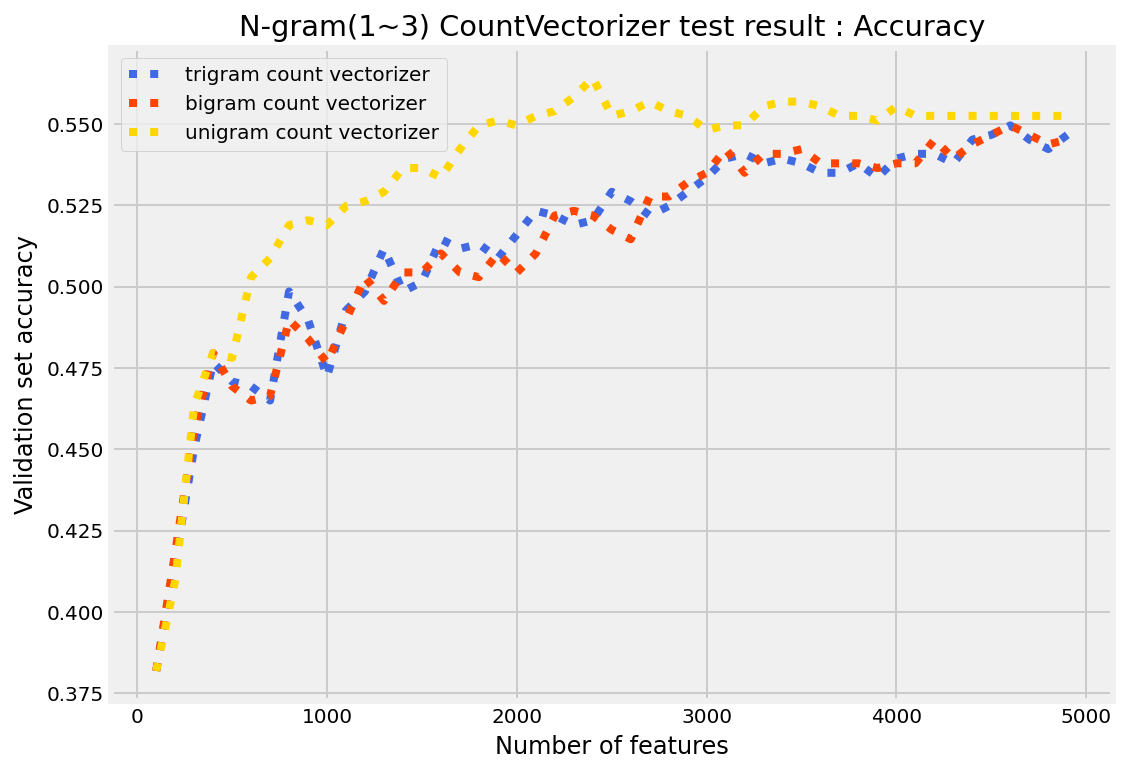

In [5]:
raw_data.UseCountVectorizer()

RESULT FOR UNIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 54.08%
Max accuracy score on test set: 51.80%
Validation result for 1800 features
f1_score: 51.47%

RESULT FOR BIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 53.64%
Max accuracy score on test set: 51.80%
Validation result for 4500 features
f1_score: 51.09%

RESULT FOR TRIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 54.08%
Max accuracy score on test set: 52.38%
Validation result for 4900 features
f1_score: 51.68%


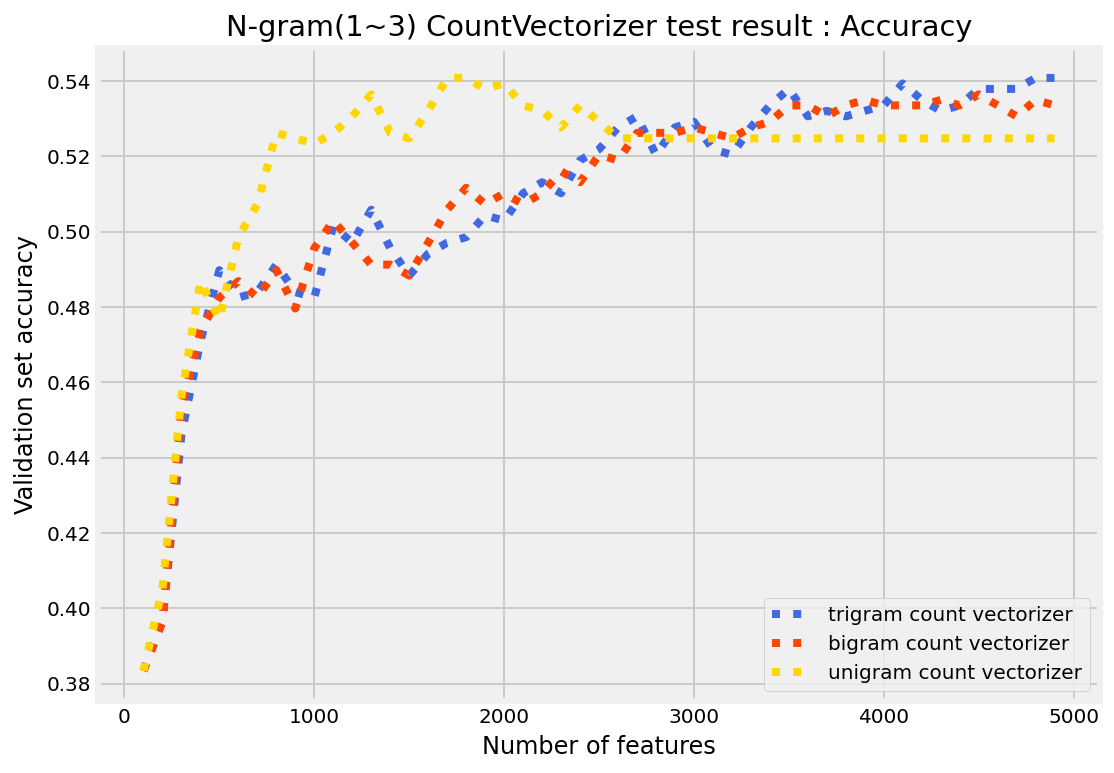

In [6]:
raw_data.UseCountVectorizer() #max df=300, min_df = 2

TFIDF Vectorizer + Linear Regression for raw data

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 54.96%
Max accuracy score on test set: 53.25%
Validation result for 2600 features
f1_score: 51.89%

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 55.69%
Max accuracy score on test set: 52.67%
Validation result for 4900 features
f1_score: 51.11%

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 55.25%
Max accuracy score on test set: 52.38%
Validation result for 3400 features
f1_score: 50.75%


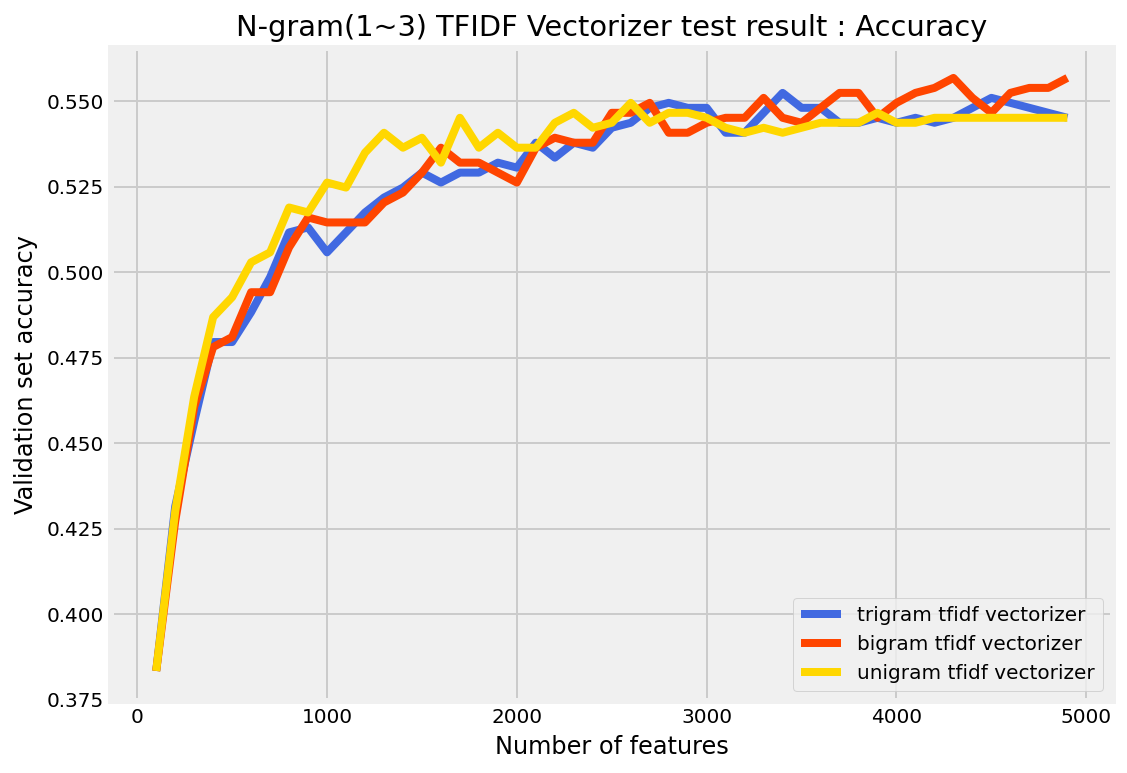

In [6]:
raw_data.UseTFIDFVectorizer()

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 51.17%
Max accuracy score on test set: 52.67%
Validation result for 2600 features
f1_score: 51.50%
Validation result for 2700 features
f1_score: 51.50%
Validation result for 2800 features
f1_score: 51.50%
Validation result for 2900 features
f1_score: 51.50%
Validation result for 3000 features
f1_score: 51.50%
Validation result for 3100 features
f1_score: 51.50%
Validation result for 3200 features
f1_score: 51.50%
Validation result for 3300 features
f1_score: 51.50%
Validation result for 3400 features
f1_score: 51.50%
Validation result for 3500 features
f1_score: 51.50%
Validation result for 3600 features
f1_score: 51.50%
Validation result for 3700 features
f1_score: 51.50%
Validation result for 3800 features
f1_score: 51.50%
Validation result for 3900 features
f1_score: 51.50%
Validation result for 4000 features
f1_score: 51.50%
Validation result for 4100 features
f1_score: 51.50%
Validation result for 4200 fea

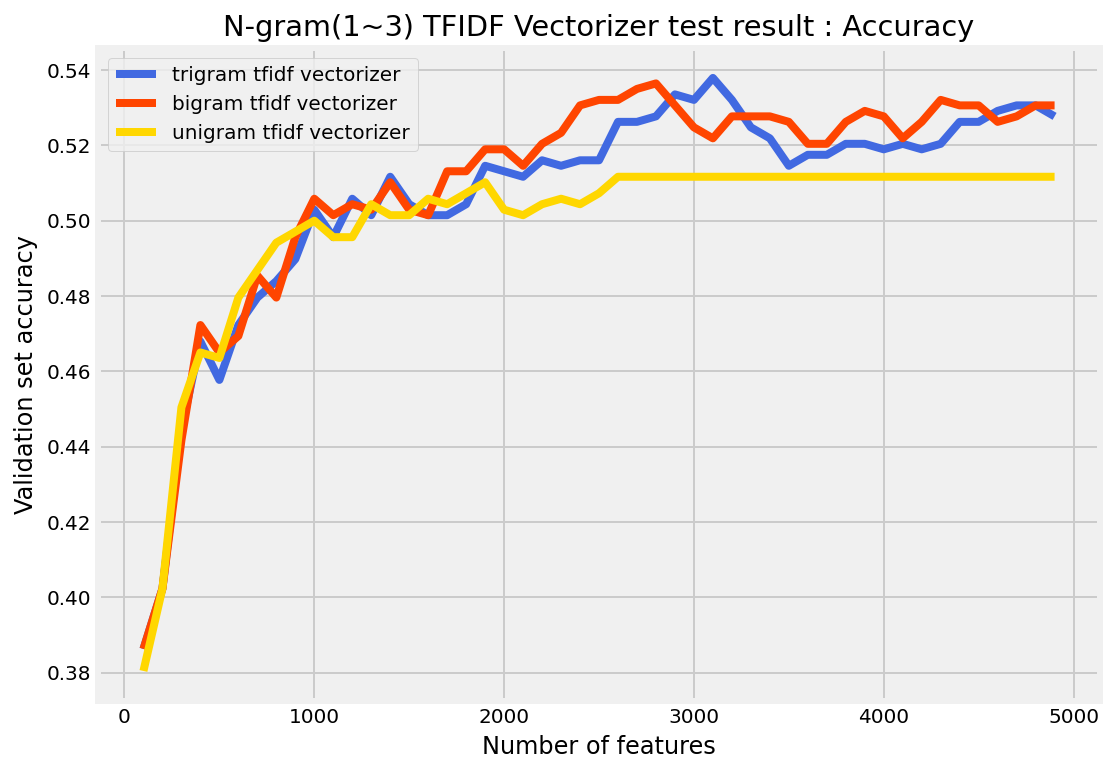

In [6]:
raw_data.UseTFIDFVectorizer() #min_df=2, max_df = 300

In [6]:
from sklearn.metrics import accuracy_score
print(raw_data.max_acc)
y_pred = raw_data.model.predict(test_df.Sentence)
accuracy = accuracy_score(test_df.Emotion, y_pred)
print(accuracy)

0.5451895043731778
0.5165945165945166


In [4]:
train_reduced = reduce_emoji.ReduceEmoji(train_df)
valid_reduced = reduce_emoji.ReduceEmoji(valid_df)
test_reduced = reduce_emoji.ReduceEmoji(test_df)

Word Statistic of reduced emoji data

In [5]:
all_reduced_data = pd.concat([train_reduced,valid_reduced,test_reduced])
reduced_data_statistic = prep.Statistics(all_reduced_data)
#reduced_data_statistic.head()
reduced_data_statistic.to_excel(r"./output/statistics/Reduced Emoji Data Statistic.xlsx")

TFIDF+Linear Regression for reduced emoji data

In [8]:
reduced_data = logistic_regression.LogisticRegression(train_reduced.Sentence, train_reduced.Emotion, valid_reduced.Sentence, valid_reduced.Emotion, test_reduced.Sentence, test_reduced.Emotion)

Count Vectorizer + Linear Regression for reduced emoji data

RESULT FOR UNIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 56.85%
Max accuracy score on test set: 56.28%
Validation result for 3800 features
f1_score: 55.83%

RESULT FOR BIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 58.89%
Max accuracy score on test set: 56.57%
Validation result for 4800 features
f1_score: 55.92%

RESULT FOR TRIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 58.60%
Max accuracy score on test set: 56.71%
Validation result for 4900 features
f1_score: 56.15%


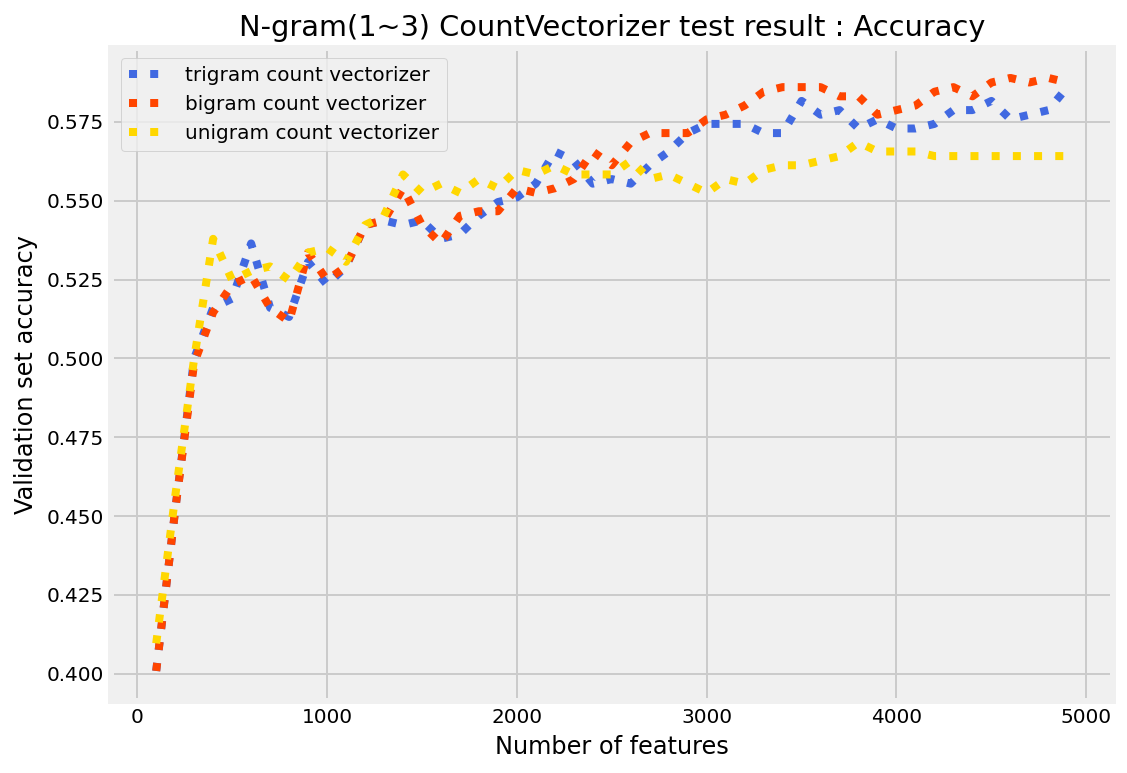

In [9]:
reduced_data.UseCountVectorizer()

RESULT FOR UNIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 53.94%
Max accuracy score on test set: 55.70%
Validation result for 2400 features
f1_score: 55.10%

RESULT FOR BIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 57.58%
Max accuracy score on test set: 53.39%
Validation result for 3700 features
f1_score: 52.93%

RESULT FOR TRIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 56.71%
Max accuracy score on test set: 55.27%
Validation result for 4600 features
f1_score: 54.83%
Validation result for 4700 features
f1_score: 54.79%


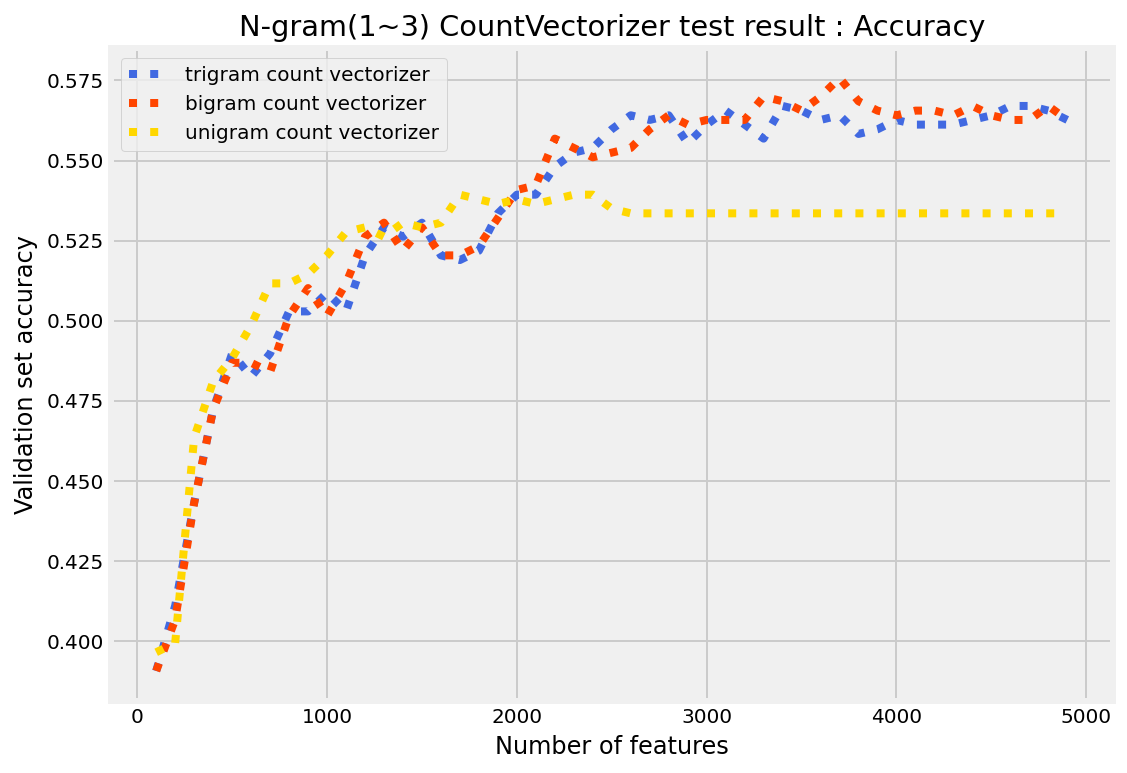

In [9]:
reduced_data.UseCountVectorizer() #min_df = 2, max_df = 300

TFIDF Vectorizer + Linear Regression for reduced emoji data

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 58.02%
Max accuracy score on test set: 58.73%
Validation result for 1800 features
f1_score: 57.16%

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 58.89%
Max accuracy score on test set: 57.86%
Validation result for 3500 features
f1_score: 55.94%

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 58.75%
Max accuracy score on test set: 57.72%
Validation result for 3300 features
f1_score: 55.79%


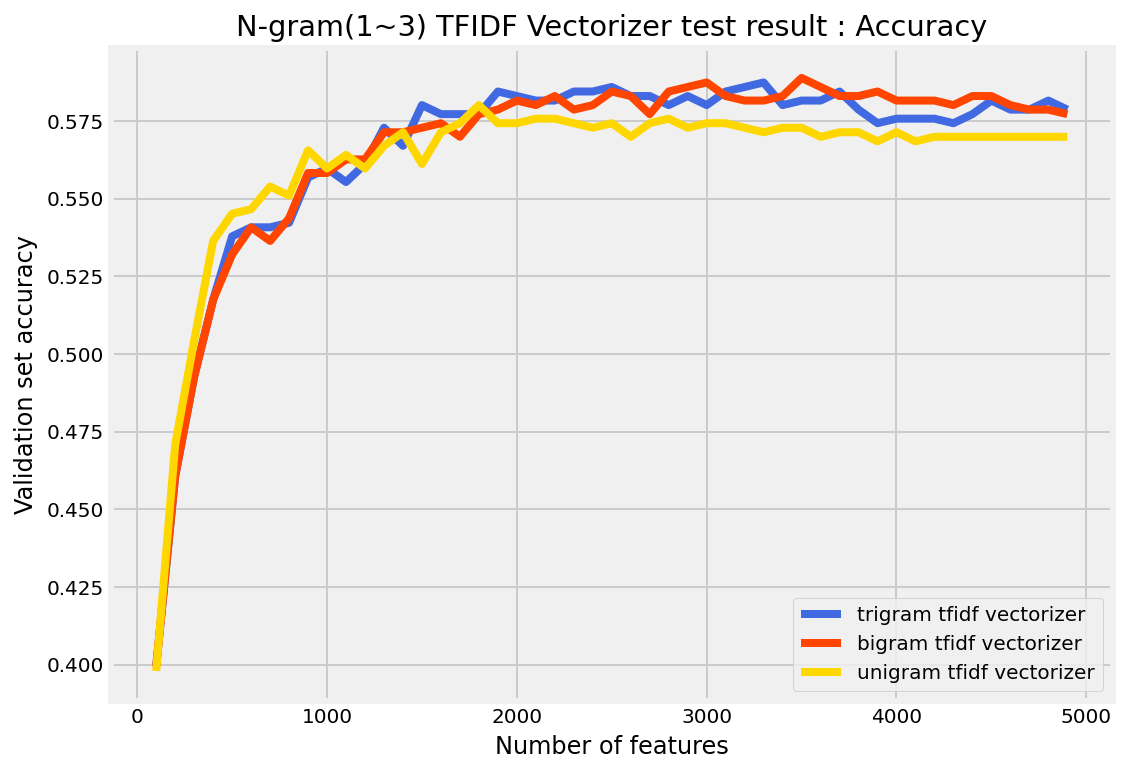

In [11]:
reduced_data.UseTFIDFVectorizer()

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 54.23%
Max accuracy score on test set: 56.13%
Validation result for 2400 features
f1_score: 54.99%

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 56.12%
Max accuracy score on test set: 56.28%
Validation result for 4900 features
f1_score: 54.49%

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 55.69%
Max accuracy score on test set: 55.70%
Validation result for 4700 features
f1_score: 53.93%
Validation result for 4900 features
f1_score: 53.90%


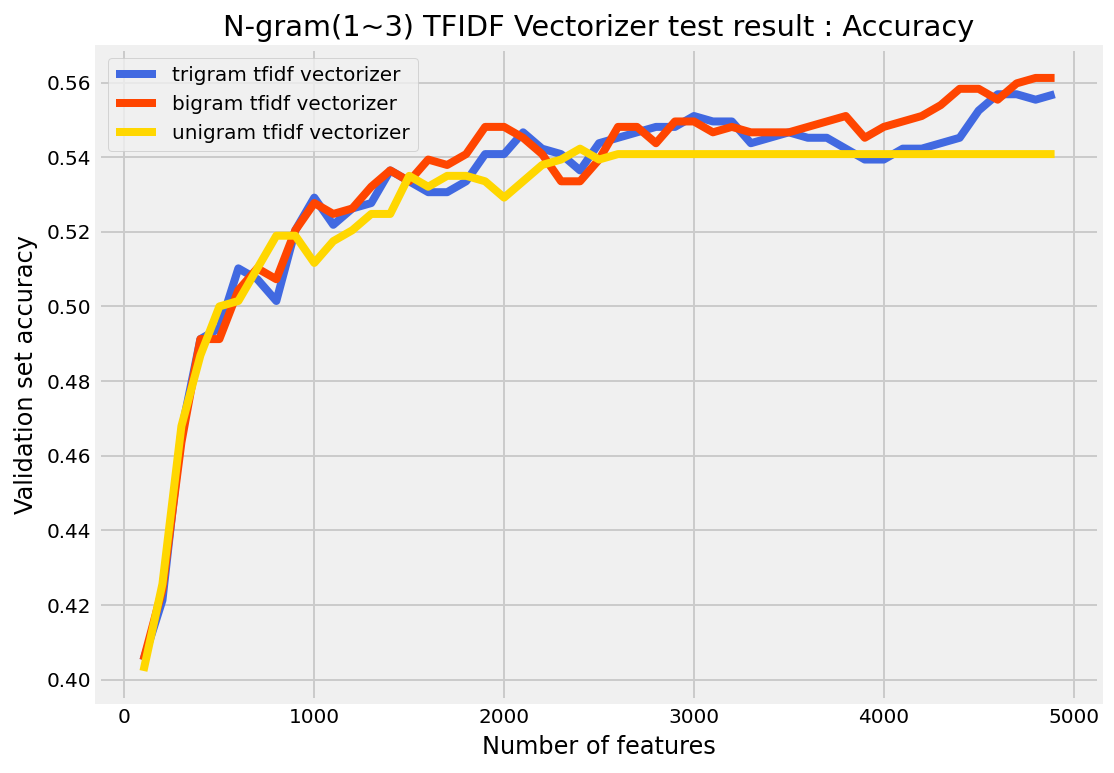

In [10]:
reduced_data.UseTFIDFVectorizer() #min_df = 2, max_df = 300

In [8]:
from sklearn.metrics import accuracy_score
print(reduced_data.max_acc)
y_pred = reduced_data.model.predict(test_reduced.Sentence)
accuracy = accuracy_score(test_reduced.Emotion, y_pred)
print(accuracy)

0.5903790087463557
0.5642135642135642


In [5]:
train_spelling = spelling_correction.SpellingCorrection(train_reduced)
valid_spelling = spelling_correction.SpellingCorrection(valid_reduced)
test_spelling = spelling_correction.SpellingCorrection(test_reduced)

Word Statistic of spelling corrected data

In [6]:
all_spelling_data = pd.concat([train_spelling,valid_spelling,test_spelling])
spelling_data_statistic = prep.Statistics(all_spelling_data)
#spelling_data_statistic.head()
spelling_data_statistic.to_excel(r"./output/statistics/Spelling corrected Data Statistic.xlsx")

In [7]:
all_spelling_data.to_excel(r"./output/statistics/Spelling corrected.xlsx")

In [6]:
spelling_data = logistic_regression.LogisticRegression(train_spelling.Sentence, train_spelling.Emotion, valid_spelling.Sentence, valid_spelling.Emotion, test_spelling.Sentence, test_spelling.Emotion)

Count Vectorizer + Linear Regression for spelling corrected data

RESULT FOR UNIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 56.12%
Max accuracy score on test set: 56.42%
Validation result for 1500 features
f1_score: 55.67%

RESULT FOR BIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 58.89%
Max accuracy score on test set: 57.72%
Validation result for 4000 features
f1_score: 57.13%

RESULT FOR TRIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 58.31%
Max accuracy score on test set: 57.86%
Validation result for 4200 features
f1_score: 57.32%


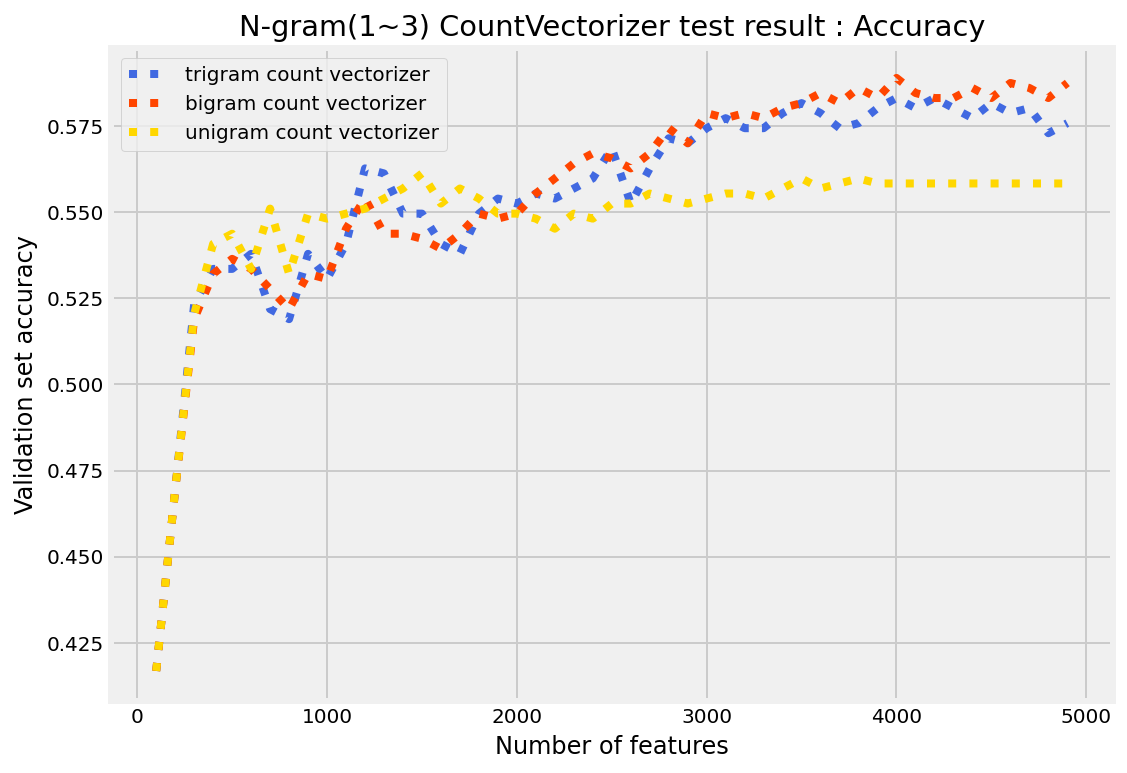

In [14]:
spelling_data.UseCountVectorizer()

WITH STOPWORD

RESULT FOR UNIGRAM (CountVectorizer)
Max accuracy score on valid set: 56.12%
Max accuracy score on test set: 55.70%
Validation result for 1400 features
f1_score: 54.96%

RESULT FOR BIGRAM (CountVectorizer)
Max accuracy score on valid set: 58.60%
Max accuracy score on test set: 58.30%
Validation result for 4700 features
f1_score: 57.72%
Validation result for 4800 features
f1_score: 57.69%

RESULT FOR TRIGRAM (CountVectorizer)
Max accuracy score on valid set: 58.75%
Max accuracy score on test set: 57.86%
Validation result for 3800 features
f1_score: 57.21%


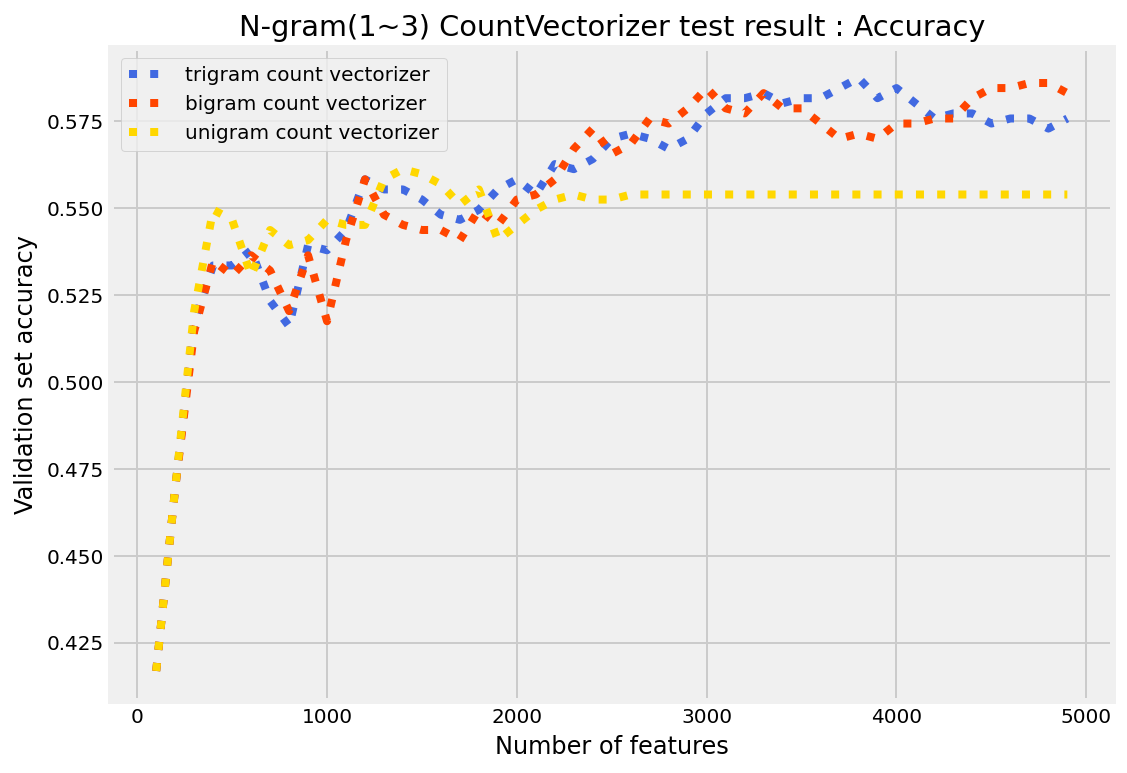

In [9]:
spelling_data.UseCountVectorizer() #min_df = 2

WITHOUT STOPWORD

RESULT FOR UNIGRAM (CountVectorizer)
Max accuracy score on valid set: 55.25%
Max accuracy score on test set: 57.00%
Validation result for 1700 features
f1_score: 56.41%

RESULT FOR BIGRAM (CountVectorizer)
Max accuracy score on valid set: 56.71%
Max accuracy score on test set: 57.00%
Validation result for 4300 features
f1_score: 56.04%

RESULT FOR TRIGRAM (CountVectorizer)
Max accuracy score on valid set: 57.00%
Max accuracy score on test set: 57.14%
Validation result for 4100 features
f1_score: 56.35%


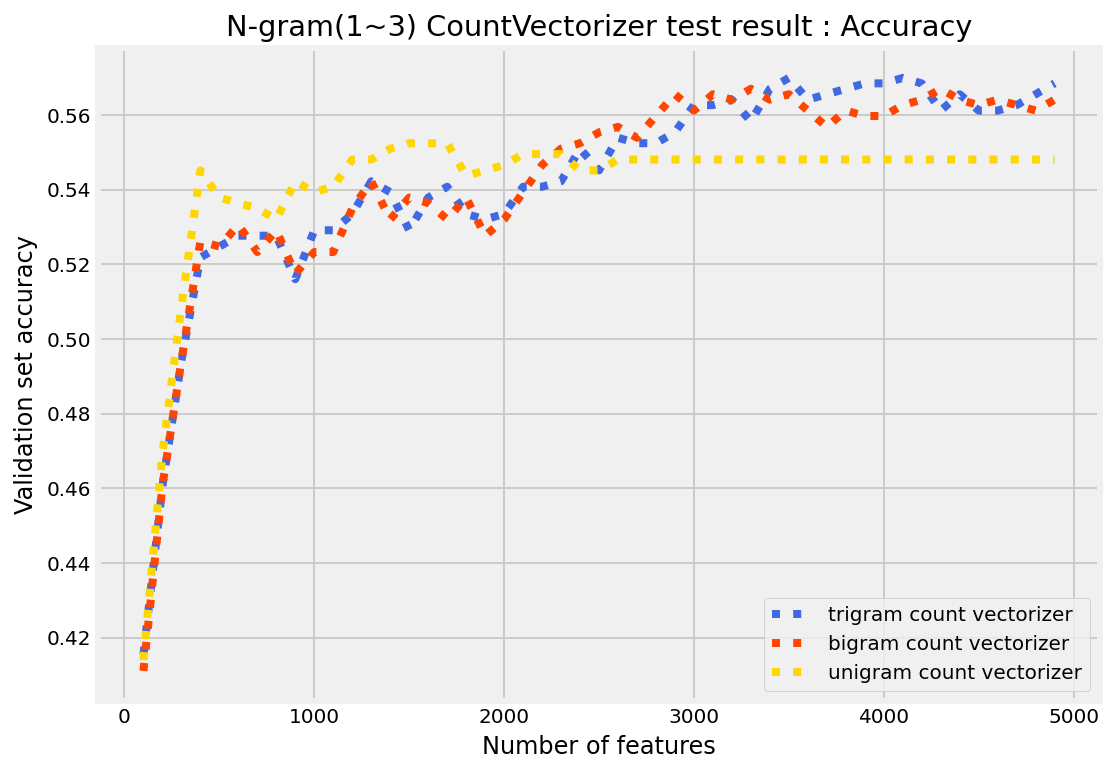

In [7]:
spelling_data.UseCountVectorizer(use_stop_words=False) #min_df = 2, remove stopwords

RESULT FOR UNIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 56.27%
Max accuracy score on test set: 55.12%
Validation result for 1300 features
f1_score: 54.48%

RESULT FOR BIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 58.31%
Max accuracy score on test set: 57.58%
Validation result for 4800 features
f1_score: 56.82%

RESULT FOR TRIGRAM WITH STOP WORDS (CountVectorizer)
Max accuracy score on valid set: 58.45%
Max accuracy score on test set: 57.43%
Validation result for 3900 features
f1_score: 56.83%


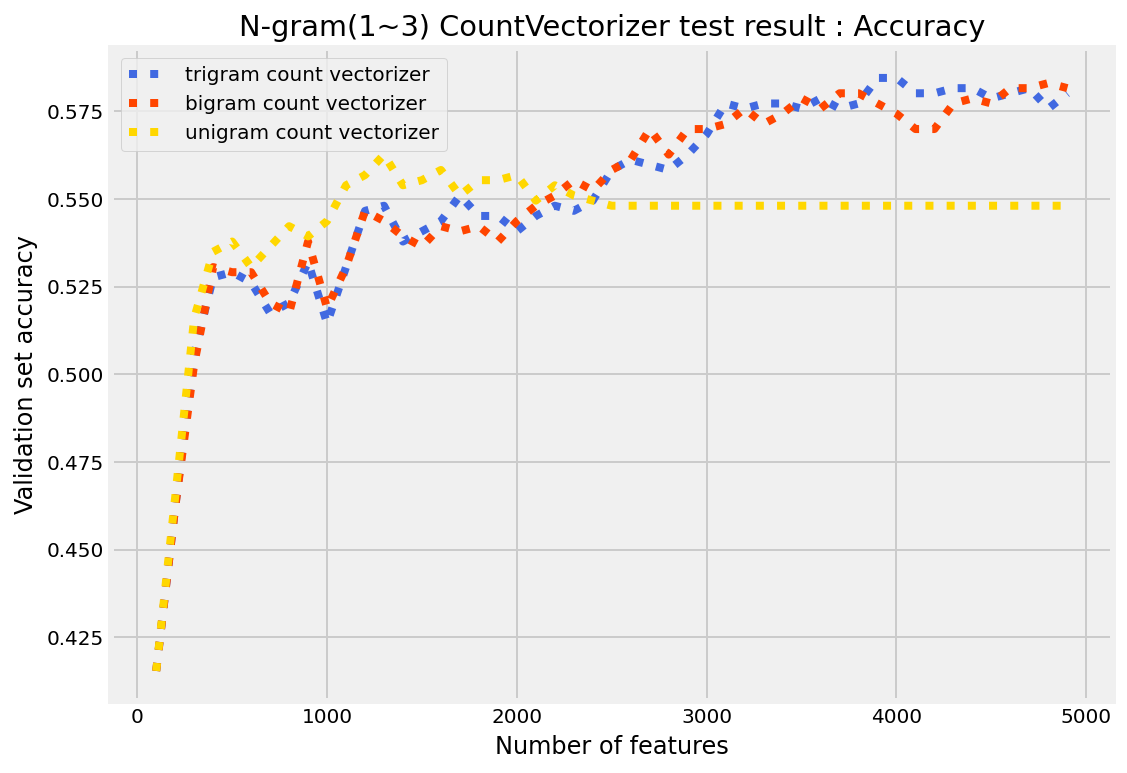

In [9]:
spelling_data.UseCountVectorizer() #remove duplicate emoji

TFIDF Vectorizer + Linear Regression for spelling corrected data

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 57.58%
Max accuracy score on test set: 58.87%
Validation result for 1200 features
f1_score: 57.30%

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 59.91%
Max accuracy score on test set: 58.30%
Validation result for 3100 features
f1_score: 56.47%

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 59.62%
Max accuracy score on test set: 59.16%
Validation result for 3700 features
f1_score: 57.19%


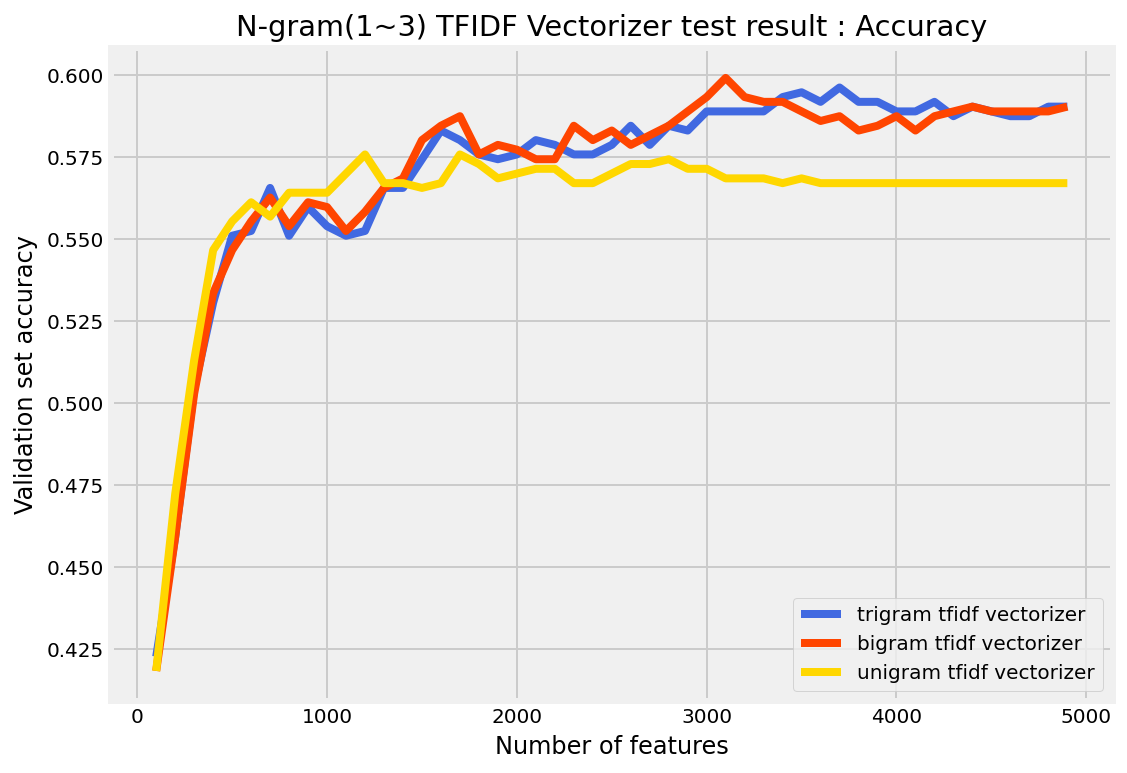

In [15]:
spelling_data.UseTFIDFVectorizer()

WITH STOPWORD
RESULT FOR UNIGRAM (Tfidf)
Max accuracy score on valid set: 57.58%
Max accuracy score on test set: 57.58%
Validation result for 2600 features
f1_score: 56.13%
Validation result for 2700 features
f1_score: 56.13%
Validation result for 2800 features
f1_score: 56.13%
Validation result for 2900 features
f1_score: 56.13%
Validation result for 3000 features
f1_score: 56.13%
Validation result for 3100 features
f1_score: 56.13%
Validation result for 3200 features
f1_score: 56.13%
Validation result for 3300 features
f1_score: 56.13%
Validation result for 3400 features
f1_score: 56.13%
Validation result for 3500 features
f1_score: 56.13%
Validation result for 3600 features
f1_score: 56.13%
Validation result for 3700 features
f1_score: 56.13%
Validation result for 3800 features
f1_score: 56.13%
Validation result for 3900 features
f1_score: 56.13%
Validation result for 4000 features
f1_score: 56.13%
Validation result for 4100 features
f1_score: 56.13%
Validation result for 4200 featu

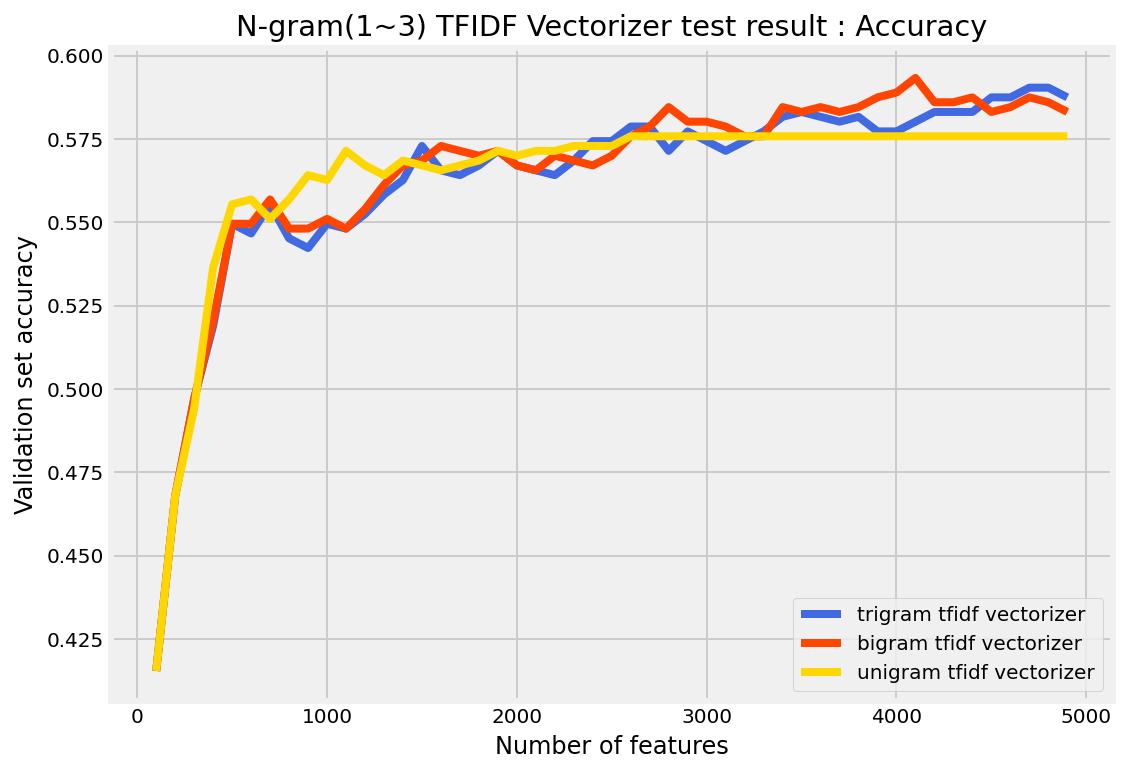

In [7]:
spelling_data.UseTFIDFVectorizer() #min_df = 2

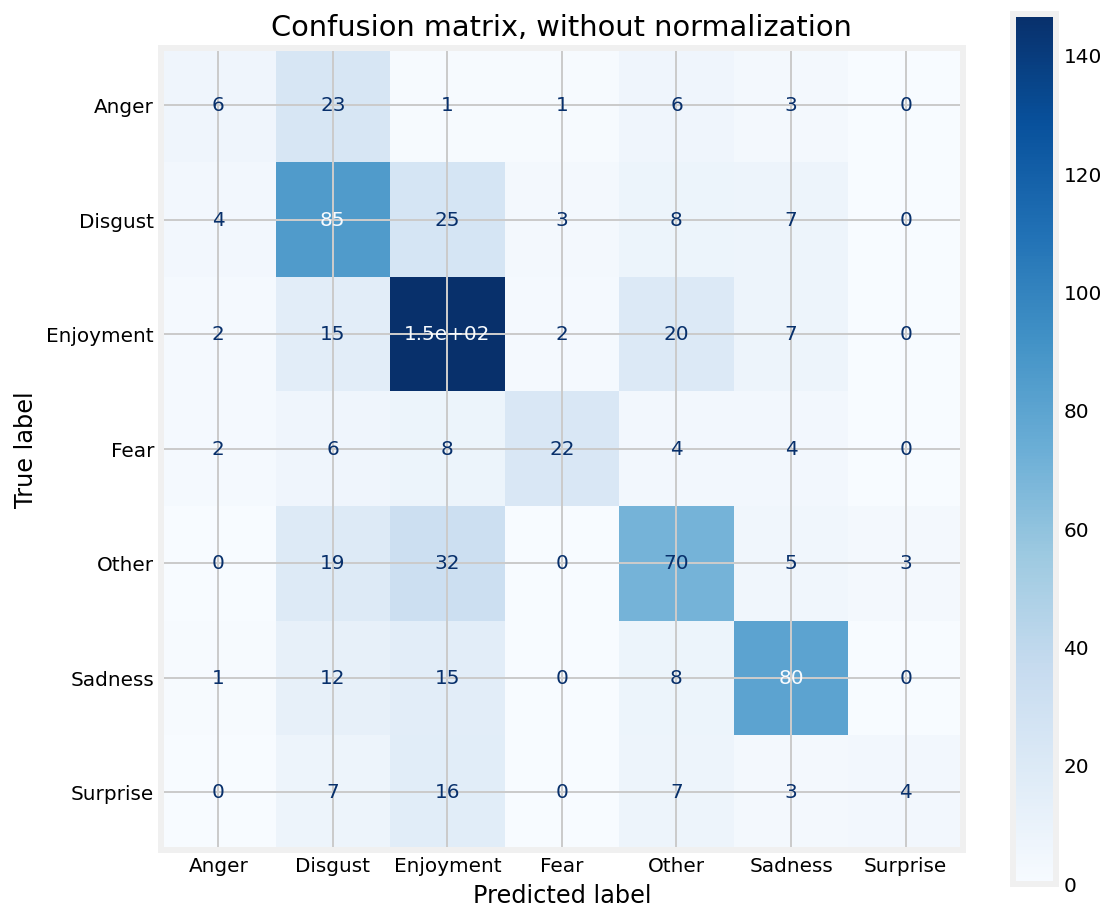

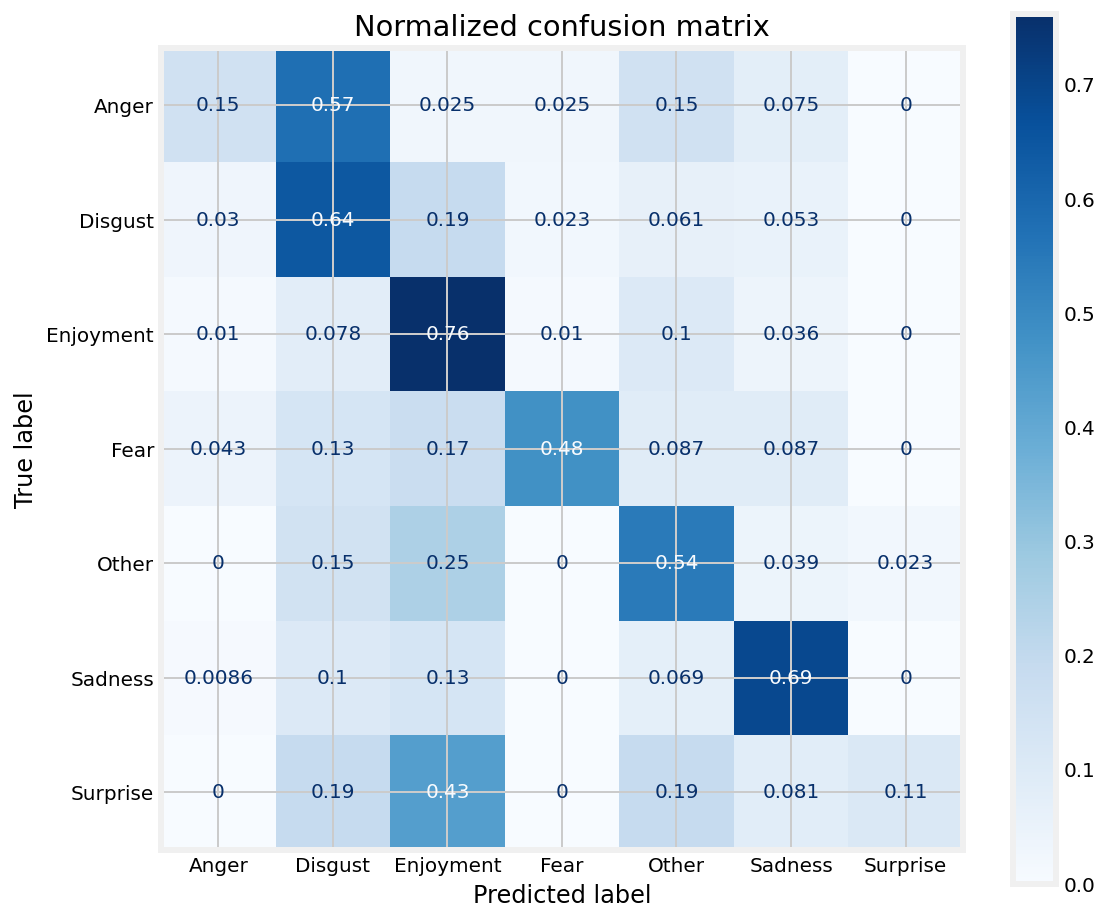

In [44]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams['figure.figsize'] = [8, 8]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(spelling_data.model[0], test_spelling.Sentence, test_spelling.Emotion,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)
    #disp.figure.savefig('filename.png')


WITHOUT STOPWORD
RESULT FOR UNIGRAM (Tfidf)
Max accuracy score on valid set: 57.43%
Max accuracy score on test set: 58.15%
Validation result for 2000 features
f1_score: 56.92%

RESULT FOR BIGRAM (Tfidf)
Max accuracy score on valid set: 57.73%
Max accuracy score on test set: 59.31%
Validation result for 3800 features
f1_score: 57.60%

RESULT FOR TRIGRAM (Tfidf)
Max accuracy score on valid set: 58.31%
Max accuracy score on test set: 59.16%
Validation result for 4900 features
f1_score: 57.32%


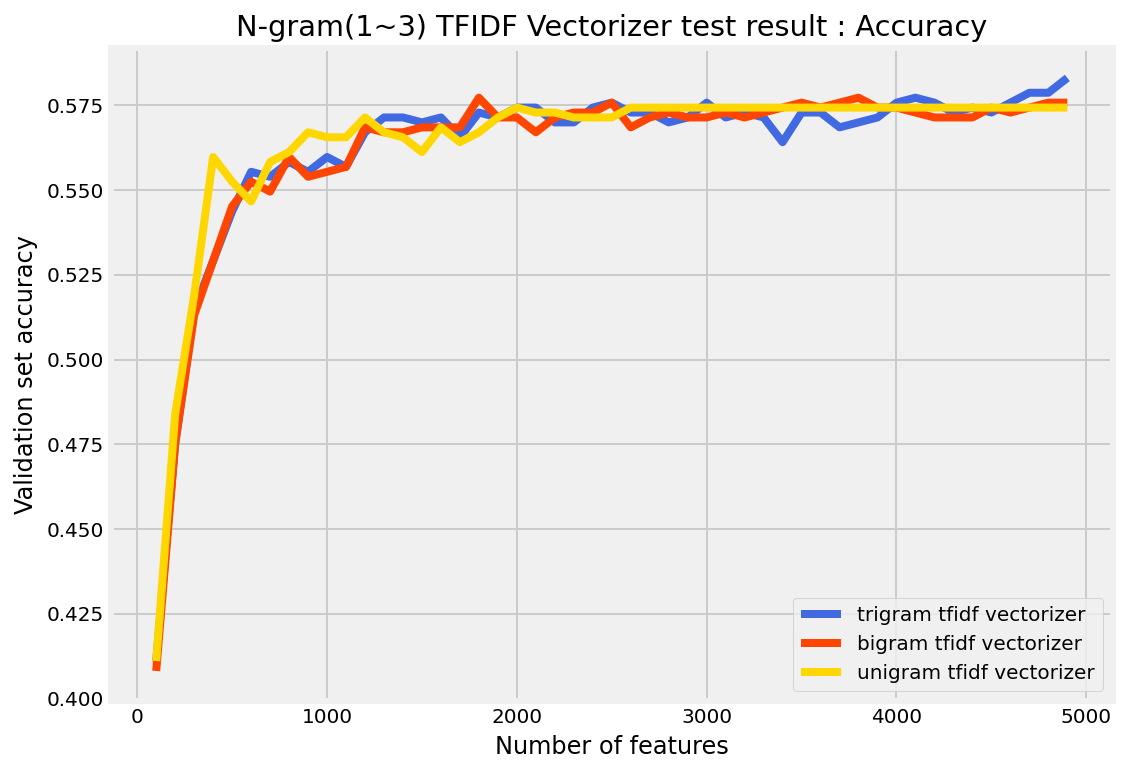

In [8]:
spelling_data.UseTFIDFVectorizer(use_stop_words=False) #min_df = 2, remove stopword

In [10]:
spelling_data.UseTFIDFVectorizer() #remove duplicate emoji

WITH STOPWORD
RESULT FOR UNIGRAM (Tfidf)


KeyboardInterrupt: 

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 57.73%
Max accuracy score on test set: 58.15%
Validation result for 2500 features
f1_score: 56.66%

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 59.62%
Max accuracy score on test set: 58.30%
Validation result for 9300 features
f1_score: 56.28%

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)
Max accuracy score on valid set: 59.33%
Max accuracy score on test set: 59.45%
Validation result for 3900 features
f1_score: 57.56%


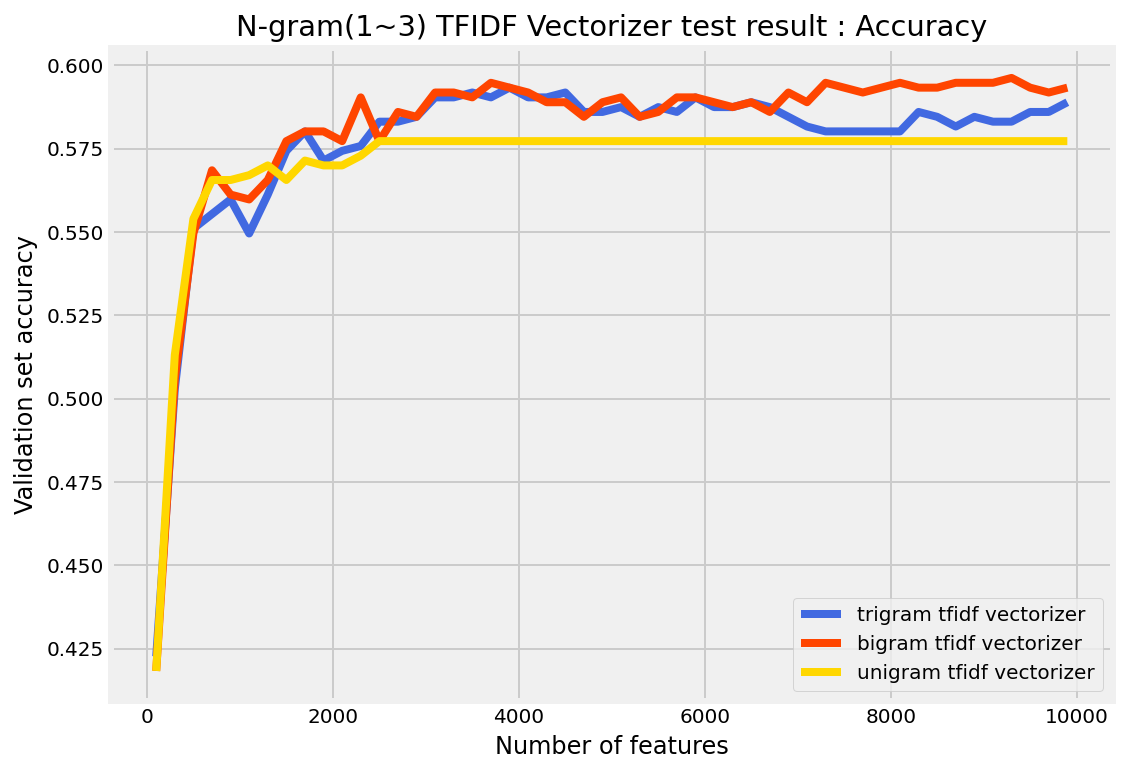

In [7]:
spelling_data.UseTFIDFVectorizer() #min_df = 3

In [129]:
train_spelling.to_excel(r"./output/train_df.xlsx",index=False)
valid_spelling.to_excel(r"./output/valid_df.xlsx",index=False)
test_spelling.to_excel(r"./output/test_df.xlsx",index=False)

In [6]:
train_segmented = word_segmentation.WordSegmentation(train_spelling)
valid_segmented = word_segmentation.WordSegmentation(valid_spelling)
test_segmented = word_segmentation.WordSegmentation(test_spelling)

In [7]:
segmented_data = logistic_regression.LogisticRegression(train_segmented.Sentence, train_segmented.Emotion, valid_segmented.Sentence, valid_segmented.Emotion, test_segmented.Sentence, test_segmented.Emotion)

In [8]:
all_segmented_data = pd.concat([train_segmented, valid_segmented, test_segmented])
segmented_data_statistic = word_statistics.WordStatistics(all_segmented_data)
segmented_data_statistic.head()
all_segmented_data.to_excel('../output/statistics/all_segmented_data.xlsx')
segmented_data_statistic.to_excel('../output/statistics/all_segmented_data Word Statistics.xlsx')

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)
Validation result for 3800 features
accuracy score: 56.12%
accuracy_test score: 57.72%

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)
Validation result for 3800 features
accuracy score: 56.85%
accuracy_test score: 55.12%

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)
Validation result for 3800 features
accuracy score: 56.27%
accuracy_test score: 54.98%


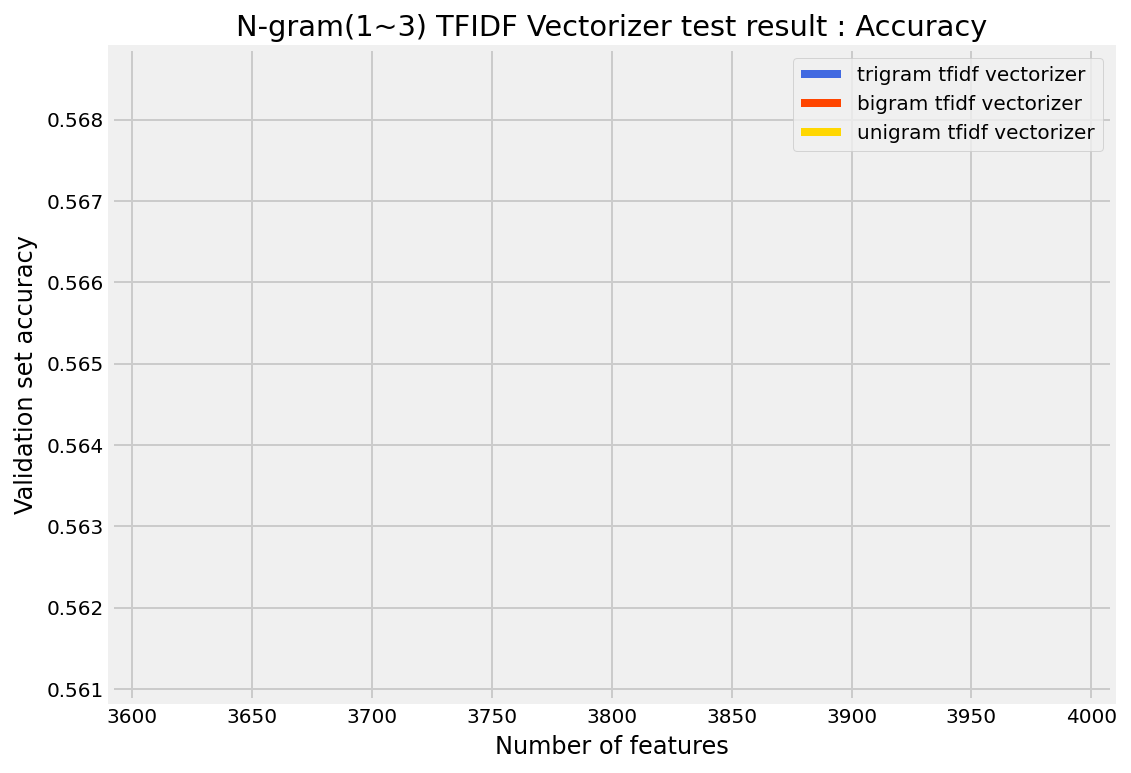

In [16]:
#for fun test
segmented_data.UseTFIDFVectorizer(n_features=3800)

In [17]:
segmented_data.TestSentence("phẫn nộ")

Other


In [20]:
print(test_segmented)

     Unnamed: 0  Unnamed: 0.1    Emotion  \
0             0           713    Sadness   
1             1          1827   Surprise   
2             2          1166    Disgust   
3             3           228       Fear   
4             4          1942      Anger   
..          ...           ...        ...   
688         688           432    Sadness   
689         689           178  Enjoyment   
690         690          1863   Surprise   
691         691           476      Other   
692         692          1607   Surprise   

                                              Sentence  
0                     người_ta có bạn_bè nhìn vui thật  
1            cho nghỉ viêc mói đúng sao goi là kỷ_luật  
2                        kinh vãi lồn : pouting_face :  
3    nhà thì không xa lắm nhưng chưa bao_giờ đi vì ...  
4        bố không thích nộp đấy mày thích ý_kiến không  
..                                                 ...  
688  lúc thì cuốc đất è_cổ ra không có giun mà câu ...  
689  các bác dẫ

RESULT FOR UNIGRAM WITH STOP WORDS (CountVectorizer)
Validation result for 100 features
accuracy score: 41.84%
accuracy_test score: 41.99%
0.40008086391552566
Validation result for 200 features
accuracy score: 45.34%
accuracy_test score: 45.17%
0.44159216761508147
Validation result for 300 features
accuracy score: 50.58%
accuracy_test score: 47.91%
0.46946418819704194
Validation result for 400 features
accuracy score: 51.31%
accuracy_test score: 50.07%
0.49380678441385123
Validation result for 500 features
accuracy score: 51.46%
accuracy_test score: 52.24%
0.5158872855916632
Validation result for 600 features
accuracy score: 50.58%
accuracy_test score: 51.52%
0.5112580552409236
Validation result for 700 features
accuracy score: 52.19%
accuracy_test score: 52.81%
0.5232545337971589
Validation result for 800 features
accuracy score: 51.31%
accuracy_test score: 53.54%
0.5304274178355617
Validation result for 900 features
accuracy score: 52.62%
accuracy_test score: 54.55%
0.541348970949247

accuracy score: 53.35%
accuracy_test score: 55.84%
0.5554193034749951
Validation result for 3000 features
accuracy score: 53.64%
accuracy_test score: 55.70%
0.5532077839170044
Validation result for 3100 features
accuracy score: 53.94%
accuracy_test score: 55.84%
0.5547450926726359
Validation result for 3200 features
accuracy score: 53.50%
accuracy_test score: 55.56%
0.5511874184196133
Validation result for 3300 features
accuracy score: 53.64%
accuracy_test score: 55.27%
0.547705836802509
Validation result for 3400 features
accuracy score: 53.64%
accuracy_test score: 54.98%
0.5455770877365556
Validation result for 3500 features
accuracy score: 53.35%
accuracy_test score: 55.27%
0.5491012947545659
Validation result for 3600 features
accuracy score: 53.50%
accuracy_test score: 55.27%
0.5496134574019372
Validation result for 3700 features
accuracy score: 53.64%
accuracy_test score: 55.12%
0.5484089834005585
Validation result for 3800 features
accuracy score: 53.50%
accuracy_test score: 54.

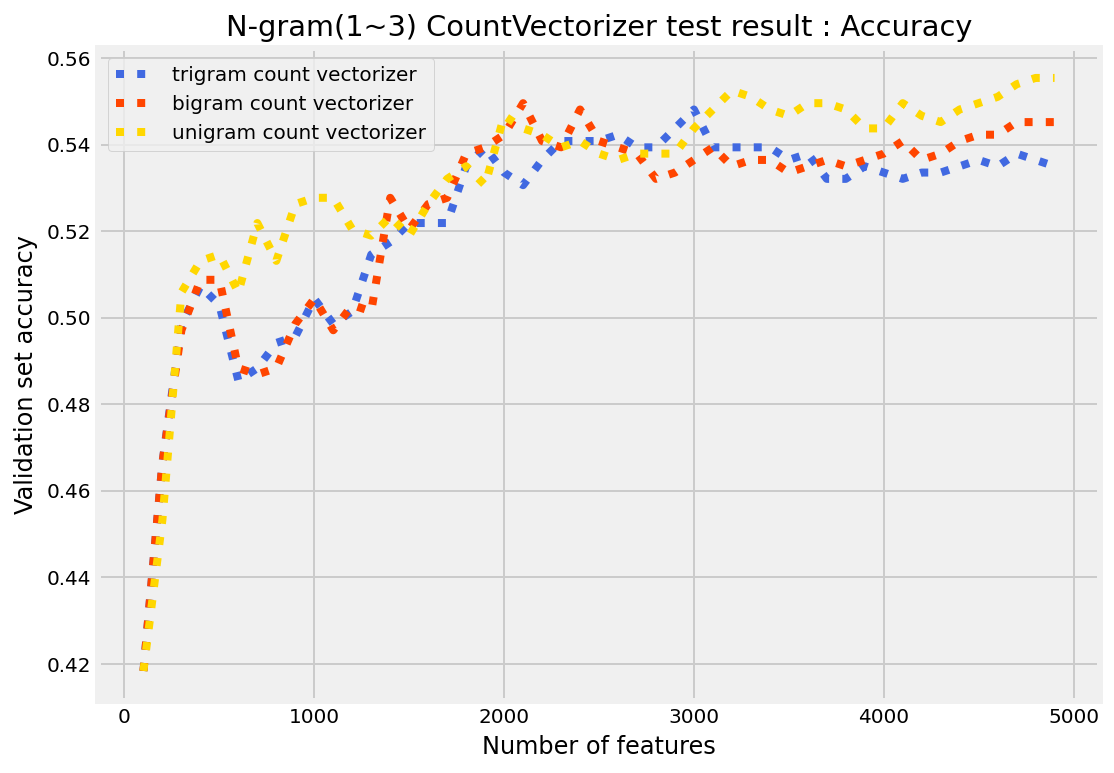

In [16]:
segmented_data.UseCountVectorizer()

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)
Validation result for 100 features
accuracy score: 41.40%
accuracy_test score: 42.28%
0.4108072681474616
Validation result for 200 features
accuracy score: 46.36%
accuracy_test score: 47.76%
0.4680500553934138
Validation result for 300 features
accuracy score: 51.17%
accuracy_test score: 51.52%
0.5043343274938578
Validation result for 400 features
accuracy score: 51.46%
accuracy_test score: 51.95%
0.5076717280791937
Validation result for 500 features
accuracy score: 51.90%
accuracy_test score: 54.55%
0.5338223945515032
Validation result for 600 features
accuracy score: 53.35%
accuracy_test score: 55.41%
0.5406386036959822
Validation result for 700 features
accuracy score: 55.10%
accuracy_test score: 56.85%
0.5562247438641791
Validation result for 800 features
accuracy score: 54.96%
accuracy_test score: 55.99%
0.5465850167338483
Validation result for 900 features
accuracy score: 54.66%
accuracy_test score: 56.57%
0.5525446860131833
Validation r

accuracy score: 56.71%
accuracy_test score: 54.69%
0.5326654631528585
Validation result for 3000 features
accuracy score: 56.71%
accuracy_test score: 54.98%
0.5350750657994529
Validation result for 3100 features
accuracy score: 56.56%
accuracy_test score: 54.83%
0.534136434662435
Validation result for 3200 features
accuracy score: 56.85%
accuracy_test score: 54.40%
0.5286919948498892
Validation result for 3300 features
accuracy score: 56.71%
accuracy_test score: 54.69%
0.5323236422919589
Validation result for 3400 features
accuracy score: 56.56%
accuracy_test score: 54.83%
0.5337683014260761
Validation result for 3500 features
accuracy score: 56.56%
accuracy_test score: 55.27%
0.5381904562935774
Validation result for 3600 features
accuracy score: 56.71%
accuracy_test score: 55.12%
0.5371204886382677
Validation result for 3700 features
accuracy score: 56.71%
accuracy_test score: 55.12%
0.5372933087558324
Validation result for 3800 features
accuracy score: 56.85%
accuracy_test score: 55.

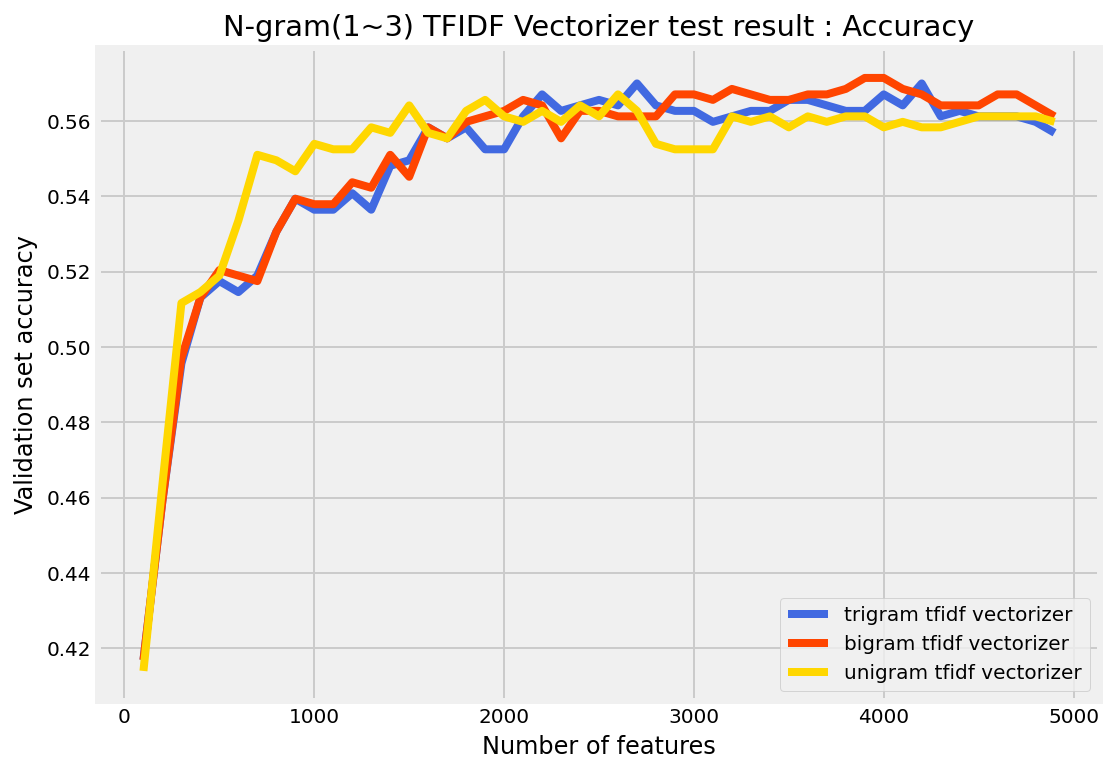

In [17]:
segmented_data.UseTFIDFVectorizer()

In [6]:
from sklearn import preprocessing
from sklearn.metrics import f1_score
from keras.models import Sequential, load_model
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from gensim.models import Word2Vec

Using TensorFlow backend.
unable to import 'smart_open.gcs', disabling that module


In [7]:
plt.style.use('ggplot')
def plot_history(history):
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [8]:
le = preprocessing.LabelEncoder()
def EncodeLabel(df):
    
    le.fit(df['Emotion'])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df.Emotion = le.transform(df['Emotion'])
    
    return df

In [9]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    
    embeddings_index = {}
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    w2v_model = Word2Vec.load(filepath)
    
    for w in w2v_model.wv.vocab.keys():
        embeddings_index[w] = w2v_model.wv[w]
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [132]:
train_cleaned_encoded = EncodeLabel(train_segmented)
test_cleaned_encoded = EncodeLabel(test_segmented)
valid_cleaned_encoded = EncodeLabel(valid_segmented)

In [172]:
x_train = train_cleaned_encoded.Sentence
y_train = train_cleaned_encoded.Emotion
x_valid = valid_cleaned_encoded.Sentence
y_valid = valid_cleaned_encoded.Emotion
x_test = test_cleaned_encoded.Sentence
y_test = test_cleaned_encoded.Emotion

In [134]:
length = []
for x in x_train:
    length.append(len(x.split()))
for x in x_valid:
    length.append(len(x.split()))
maxlen = max(length)
print(maxlen)

132


In [4]:
max([1,2,3])

3

In [173]:
tokenizer = Tokenizer(num_words=3500)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_valid = tokenizer.texts_to_sequences(x_valid)
x_valid = pad_sequences(x_valid, padding='post', maxlen=maxlen)
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
vocab_size = len(tokenizer.word_index) + 1

In [136]:
embedding_dim = 100
embedding_matrix=create_embedding_matrix('./vi.bin', tokenizer.word_index, embedding_dim)

In [137]:
input_dim = x_train.shape
print(input_dim)

(5548, 132)


In [138]:
print(vocab_size)

3822


In [ ]:
,trainable=True weights=[embedding_matrix],

In [174]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           trainable=True,
                           input_length=maxlen))
model.add(layers.Conv1D(128, 4, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(87, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callbacks = [ReduceLROnPlateau(),
    EarlyStopping(patience=2),
    ModelCheckpoint(filepath='./model-simple.h5', save_best_only=True)]
model.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_50 (Embedding)     (None, 132, 100)          382200    
_________________________________________________________________
conv1d_64 (Conv1D)           (None, 129, 128)          51328     
_________________________________________________________________
global_max_pooling1d_50 (Glo (None, 128)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 40)                5160      
_________________________________________________________________
dense_97 (Dense)             (None, 87)                3567      
Total params: 442,255
Trainable params: 442,255
Non-trainable params: 0
_________________________________________________________________


c:\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5548 samples, validate on 686 samples
Epoch 1/10
 - 9s - loss: 1.7323 - accuracy: 0.3837 - val_loss: 1.3423 - val_accuracy: 0.5277
Epoch 2/10
 - 9s - loss: 1.1120 - accuracy: 0.6081 - val_loss: 1.2287 - val_accuracy: 0.5685
Epoch 3/10
 - 9s - loss: 0.7754 - accuracy: 0.7307 - val_loss: 1.2903 - val_accuracy: 0.5656
Epoch 4/10
 - 9s - loss: 0.4763 - accuracy: 0.8432 - val_loss: 1.4256 - val_accuracy: 0.5758


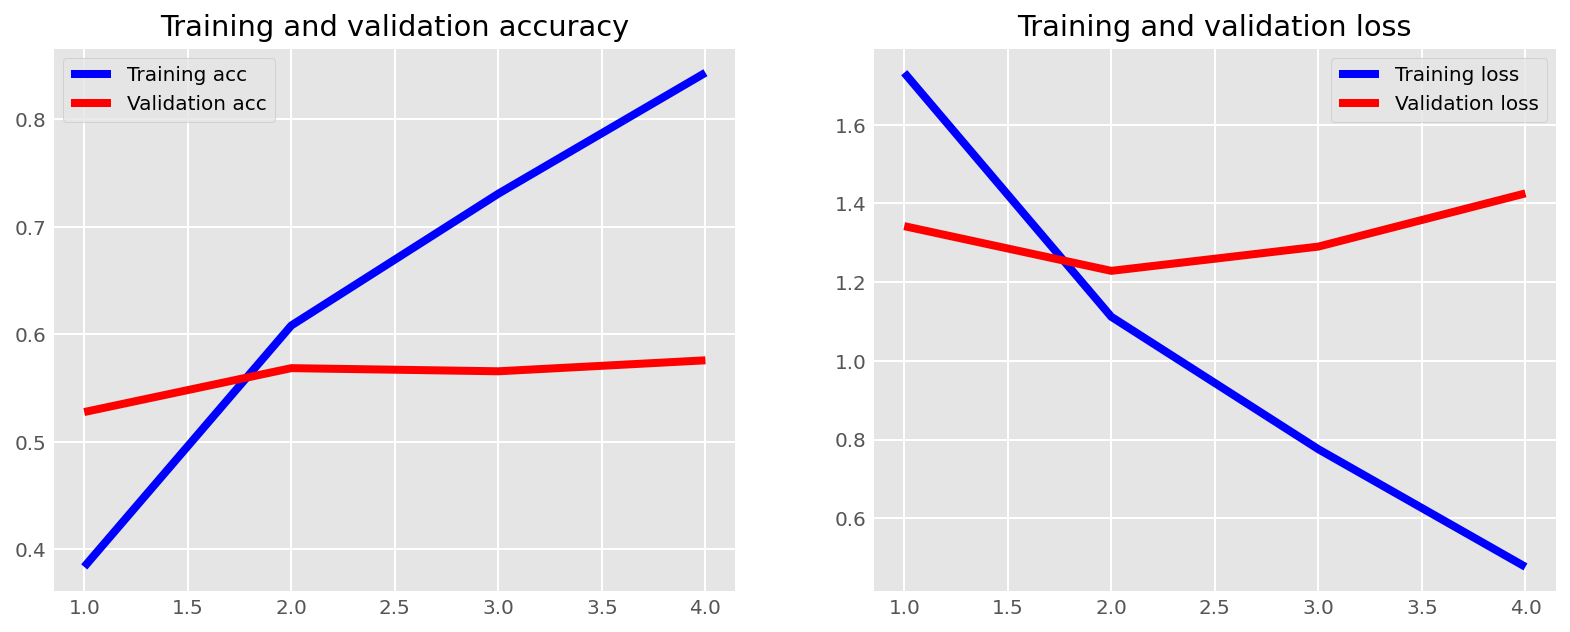

In [175]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    verbose=2,
                    validation_data=(x_valid, y_valid),
                    batch_size=10,
                   callbacks=callbacks)
plot_history(history)

In [196]:
cnn_model = load_model('./model-simple.h5')
train_loss, train_accuracy = cnn_model.evaluate(x_train, y_train, verbose=False)
val_loss, val_accuracy = cnn_model.evaluate(x_valid, y_valid, verbose=False)
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=False)
weighted_f1_score = f1_score(y_test, cnn_model.predict_classes(x_test), average="weighted")
print("Training Accuracy: {:.2f}%".format(train_accuracy*100))
print("Valid {}: {}".format(model.metrics_names[0], val_loss))
print("Valid {}: {:.2f}".format(model.metrics_names[1], val_accuracy*100))
print("Test {}: {}".format(model.metrics_names[0], test_loss))
print("Test {}: {:.2f}".format(model.metrics_names[1], test_accuracy*100))
print("f1-score: {:.2f}%".format(weighted_f1_score*100))

c:\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Training Accuracy: 75.88%
Valid loss: 1.228677121612838
Valid accuracy: 56.85
Test loss: 1.2711265486212175
Test accuracy: 54.11
f1-score: 53.09%


In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(max_iter= 200),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

In [111]:
x_train = train_df.Sentence[:800]
y_train = train_df.Emotion[:800]
x_valid = valid_df.Sentence[:200]
y_valid = valid_df.Emotion[:200]
x_test = test_df.Sentence[:100]
y_test = test_df.Emotion[:100]

In [112]:
from sklearn.metrics import accuracy_score, f1_score
def accuracy_summary(pipeline, x_train, y_train, x_valid, y_valid):

    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_valid)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_valid, y_pred)
    weighted_f1_score = f1_score(y_valid, y_pred, average="weighted")
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print("f1-score: {0:.2f}%".format(weighted_f1_score*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [113]:
tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=3500, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_valid, y_valid)
        result.append((n,clf_accuracy,tt_time))
    return result

In [114]:
trigram_result = classifier_comparator(n_features=3000,ngram_range=(1,1))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy score: 45.50%
f1-score: 39.38%
train and test time: 0.27s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
accuracy score: 40.50%
f1-score: 38.84%
train and test time: 0.07s
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(

In [1]:
%run main.py

Using TensorFlow backend.
unable to import 'smart_open.gcs', disabling that module


Which algorithm do you want to use?
[1]: Logistic Regression
[2]: Convolutional Neural Network
[3]: Test on built model
[1/2/3] 3


c:\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Do you want to test on sentence [1] or excel file contains sentence [2] ? [1/2] 2


c:\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
